<a href="https://colab.research.google.com/github/rahuls569/-S3---Assignment-QnA./blob/main/S3/S3_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 3, padding=1) #input -? OUtput? RF
#         self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
#         self.pool1 = nn.MaxPool2d(2, 2)
#         self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
#         self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
#         self.pool2 = nn.MaxPool2d(2, 2)
#         self.conv5 = nn.Conv2d(256, 512, 3)
#         self.conv6 = nn.Conv2d(512, 1024, 3)
#         self.conv7 = nn.Conv2d(1024, 10, 3)

#     def forward(self, x):
#         x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
#         x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
#         x = F.relu(self.conv6(F.relu(self.conv5(x))))
#         # x = self.conv7(x)
#         x = x.view(-1, 10)
#         return F.log_softmax(x)

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
#         self.bn1 = nn.BatchNorm2d(8)
#         self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
#         self.bn2 = nn.BatchNorm2d(16)
#         self.pool1 = nn.MaxPool2d(2, 2)
#         self.conv3 = nn.Conv2d(16, 16, 3, padding=1)
#         self.bn3 = nn.BatchNorm2d(16)
#         self.conv4 = nn.Conv2d(16, 32, 3, padding=1)
#         self.bn4 = nn.BatchNorm2d(32)
#         self.pool2 = nn.MaxPool2d(2, 2)
#         self.conv5 = nn.Conv2d(32, 64, 1, padding=1)
#         self.bn5 = nn.BatchNorm2d(64)
#         self.conv6 = nn.Conv2d(64, 64, 1, padding=1)
#         self.bn6 = nn.BatchNorm2d(64)
#         self.conv7 = nn.Conv2d(64, 10, 1, padding=1)
#         self.gap = nn.AdaptiveAvgPool2d((1,1))
#         self.dropout = nn.Dropout(p=0.5)
#         self.fc = nn.Linear(10, 10)

#     def forward(self, x):
#         x = self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
#         x = self.pool2(F.relu(self.bn4(self.conv4(F.relu(self.bn3(self.conv3(x)))))))
#         x = F.relu(self.bn6(self.conv6(F.relu(self.bn5(self.conv5(x))))))
#         x = F.relu(self.conv7(x))
#         x = self.gap(x)
#         x = x.view(-1, 10)
#         x = self.dropout(x)
#         x = self.fc(x)
#         return F.log_softmax(x)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1) # 1 input channel, 8 output channels, 3x3 kernel size, 1 padding
        self.bn1 = nn.BatchNorm2d(8) # batch normalization for 8 channels
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1) # 8 input channels, 16 output channels, 3x3 kernel size, 1 padding
        self.bn2 = nn.BatchNorm2d(16) # batch normalization for 16 channels
        self.pool1 = nn.MaxPool2d(2, 2) # 2x2 max pooling
        self.conv3 = nn.Conv2d(16, 16, 3, padding=1) # 16 input channels, 16 output channels, 3x3 kernel size, 1 padding
        self.bn3 = nn.BatchNorm2d(16) # batch normalization for 16 channels
        self.conv4 = nn.Conv2d(16, 32, 3, padding=1) # 16 input channels, 32 output channels, 3x3 kernel size, 1 padding
        self.bn4 = nn.BatchNorm2d(32) # batch normalization for 32 channels
        self.pool2 = nn.MaxPool2d(2, 2) # 2x2 max pooling
        self.conv5 = nn.Conv2d(32, 64, 1, padding=1) # 32 input channels, 64 output channels, 1x1 kernel size, 1 padding
        self.bn5 = nn.BatchNorm2d(64) # batch normalization for 64 channels
        self.conv6 = nn.Conv2d(64, 64, 1, padding=1) # 64 input channels, 64 output channels, 1x1 kernel size, 1 padding
        self.bn6 = nn.BatchNorm2d(64) # batch normalization for 64 channels
        self.conv7 = nn.Conv2d(64, 10, 1, padding=1) # 64 input channels, 10 output channels, 1x1 kernel size, 1 padding
        self.gap = nn.AdaptiveAvgPool2d((1,1)) # Global Average Pooling
        self.dropout1 = nn.Dropout(p=0.25) # dropout probability of 0.25
        self.dropout2 = nn.Dropout(p=0.25) # dropout probability of 0.25
        self.dropout3 = nn.Dropout(p=0.25) # dropout probability of 0.25
        self.fc = nn.Linear(10, 10) # fully connected layer, 10 input, 10 output

    def forward(self, x):
        x = self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
        x = self.dropout1(x)
        x = self.pool2(F.relu(self.bn4(self.conv4(F.relu(self.bn3(self.conv3(x)))))))
        x = self.dropout2(x)
        x = F.relu(self.bn6(self.conv6(F.relu(self.bn5(self.conv5(x))))))
        x = self.dropout3(x)
        x = F.relu(self.conv7(x))
        x = self.gap(x)
        x = x.view(-1, 10)
        x = self.fc(x)
        return F.log_softmax(x)

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 4, 3, padding=1)
#         self.bn1 = nn.BatchNorm2d(4)
#         self.pool1 = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(4, 16, 3, padding=1)
#         self.bn2 = nn.BatchNorm2d(16)
#         self.pool2 = nn.MaxPool2d(2, 2)
#         self.conv3 = nn.Conv2d(16, 64, 3, padding=1)
#         self.bn3 = nn.BatchNorm2d(64)
#         self.pool3 = nn.MaxPool2d(2, 2)
#         self.dropout1 = nn.Dropout(p=0.5)
#         self.conv4 = nn.Conv2d(64, 10, 1, padding=1)           
#         self.gap = nn.AdaptiveAvgPool2d((1,1))
#         self.dropout2 = nn.Dropout(p=0.2)
#         self.dropout3 = nn.Dropout(p=0.2)
#         self.fc = nn.Linear(10, 10)

#     def forward(self, x):

#         x = self.pool1(F.relu(self.bn1(self.conv1(x))))
#         x = self.pool2(F.relu(self.bn2(self.conv2(x))))
#         x = self.pool3(F.relu(self.bn3(self.conv3(x))))
#         x = self.dropout1(x)
#         x = F.relu(self.conv4(x)) 
#         x = self.dropout2(x)
#         x = self.gap(x)
#         x = x.view(-1, 10)
#         x = self.fc(x)
#         return F.log_softmax(x)

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))
device

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3           [-1, 16, 28, 28]           1,168
       BatchNorm2d-4           [-1, 16, 28, 28]              32
         MaxPool2d-5           [-1, 16, 14, 14]               0
           Dropout-6           [-1, 16, 14, 14]               0
            Conv2d-7           [-1, 16, 14, 14]           2,320
       BatchNorm2d-8           [-1, 16, 14, 14]              32
            Conv2d-9           [-1, 32, 14, 14]           4,640
      BatchNorm2d-10           [-1, 32, 14, 14]              64
        MaxPool2d-11             [-1, 32, 7, 7]               0
          Dropout-12             [-1, 32, 7, 7]               0
    

<ipython-input-61-fabcb814650d>:39: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


device(type='cpu')

In [ ]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)



labels: tensor([4, 8, 8, 6, 7, 1, 0, 7, 1, 8, 7, 6, 4, 9, 1, 5, 3, 2, 6, 8, 8, 6, 9, 4,
        6, 0, 4, 2, 6, 7, 0, 5, 8, 6, 0, 3, 5, 7, 4, 7, 5, 1, 6, 7, 3, 6, 0, 3,
        1, 1, 2, 6, 7, 9, 8, 0, 7, 2, 4, 3, 6, 5, 9, 5, 2, 3, 5, 3, 5, 8, 9, 2,
        7, 1, 2, 4, 0, 2, 0, 6, 7, 2, 9, 5, 7, 1, 2, 2, 3, 3, 8, 8, 1, 0, 5, 7,
        5, 9, 6, 7, 2, 5, 9, 7, 5, 7, 1, 7, 8, 7, 8, 8, 8, 2, 1, 4, 1, 1, 3, 2,
        9, 5, 1, 9, 0, 3, 0, 3])


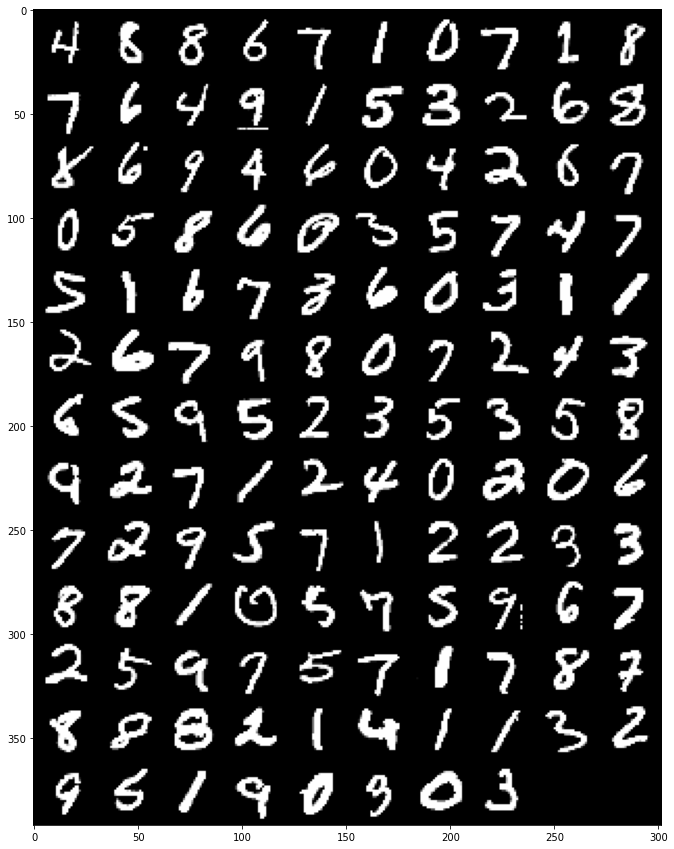

In [ ]:
import torchvision 
import torchvision.transforms as transform
import numpy as np
import matplotlib.pyplot as plt
batch = next(iter(train_loader))
images, labels = batch
images.shape, labels.shape
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [ ]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

for epoch in range(1, 19):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]<ipython-input-61-fabcb814650d>:39: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
loss=0.33131274580955505 batch_id=468: 100%|██████████| 469/469 [01:52<00:00,  4.16it/s]



Test set: Average loss: 0.2858, Accuracy: 9260/10000 (92.6%)



loss=0.10861426591873169 batch_id=468: 100%|██████████| 469/469 [01:46<00:00,  4.41it/s]



Test set: Average loss: 0.1584, Accuracy: 9551/10000 (95.5%)



loss=0.2127656489610672 batch_id=468: 100%|██████████| 469/469 [01:43<00:00,  4.51it/s]



Test set: Average loss: 0.0939, Accuracy: 9717/10000 (97.2%)



loss=0.0997663363814354 batch_id=468: 100%|██████████| 469/469 [01:52<00:00,  4.17it/s]



Test set: Average loss: 0.1406, Accuracy: 9523/10000 (95.2%)



loss=0.12740914523601532 batch_id=468: 100%|██████████| 469/469 [01:45<00:00,  4.45it/s]



Test set: Average loss: 0.0821, Accuracy: 9737/10000 (97.4%)



loss=0.06519751250743866 batch_id=468: 100%|██████████| 469/469 [01:44<00:00,  4.49it/s]



Test set: Average loss: 0.0991, Accuracy: 9684/10000 (96.8%)



loss=0.12295011430978775 batch_id=468: 100%|██████████| 469/469 [01:45<00:00,  4.45it/s]



Test set: Average loss: 0.0536, Accuracy: 9834/10000 (98.3%)



loss=0.10014616698026657 batch_id=468: 100%|██████████| 469/469 [01:43<00:00,  4.52it/s]



Test set: Average loss: 0.0511, Accuracy: 9844/10000 (98.4%)



loss=0.08804547041654587 batch_id=468: 100%|██████████| 469/469 [01:45<00:00,  4.46it/s]



Test set: Average loss: 0.0490, Accuracy: 9850/10000 (98.5%)



loss=0.0172394048422575 batch_id=468: 100%|██████████| 469/469 [01:46<00:00,  4.40it/s]



Test set: Average loss: 0.0559, Accuracy: 9826/10000 (98.3%)



loss=0.0842280164361 batch_id=468: 100%|██████████| 469/469 [01:44<00:00,  4.50it/s]



Test set: Average loss: 0.0456, Accuracy: 9838/10000 (98.4%)



loss=0.06229675933718681 batch_id=468: 100%|██████████| 469/469 [01:46<00:00,  4.40it/s]



Test set: Average loss: 0.0583, Accuracy: 9796/10000 (98.0%)



loss=0.06283388286828995 batch_id=468: 100%|██████████| 469/469 [01:45<00:00,  4.44it/s]



Test set: Average loss: 0.0508, Accuracy: 9837/10000 (98.4%)



loss=0.00676104286685586 batch_id=468: 100%|██████████| 469/469 [01:45<00:00,  4.47it/s]



Test set: Average loss: 0.0384, Accuracy: 9875/10000 (98.8%)



loss=0.10916317254304886 batch_id=468: 100%|██████████| 469/469 [01:46<00:00,  4.42it/s]



Test set: Average loss: 0.0387, Accuracy: 9873/10000 (98.7%)



loss=0.033259082585573196 batch_id=468: 100%|██████████| 469/469 [01:43<00:00,  4.52it/s]



Test set: Average loss: 0.0391, Accuracy: 9871/10000 (98.7%)



loss=0.09819193929433823 batch_id=468: 100%|██████████| 469/469 [01:44<00:00,  4.51it/s]



Test set: Average loss: 0.0363, Accuracy: 9875/10000 (98.8%)



loss=0.038744088262319565 batch_id=468: 100%|██████████| 469/469 [01:44<00:00,  4.48it/s]



Test set: Average loss: 0.0374, Accuracy: 9889/10000 (98.9%)

